## Importing Libraries

In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##Importing the file
dataset=pd.read_csv('position_salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
X=dataset.iloc[:,1:2].values

In [6]:
##Converting the X into 2-D Array
X=np.reshape(X,(-1,1))
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y=dataset.iloc[:,-1].values

In [8]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

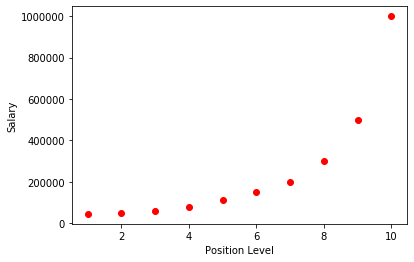

In [9]:
##Visualizing the original data

plt.scatter(X,y,color="red")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [10]:
## As the dataset is very small ,so there is no need to split the data in test & train dataset

##Fitting into a Linear model
from sklearn.linear_model import LinearRegression
Linear_reg=LinearRegression()
Linear_reg.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
from sklearn.preprocessing import PolynomialFeatures

##Creating an obect of Polynomial Features of 3 degree

polynomial_reg=PolynomialFeatures(degree=3)

In [12]:
#Trnsforming the data into polynomial form
X_poly=polynomial_reg.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [13]:
##Fitting into a polynomial model
polynomial_reg.fit(X_poly,y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [14]:
Linear_reg2=LinearRegression()
Linear_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

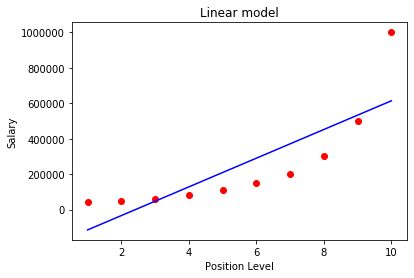

In [15]:
##visualising the Linear Model Formed

plt.scatter(X,y,color="red")
plt.plot(X,Linear_reg.predict(X),color='blue')
plt.title('Linear model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

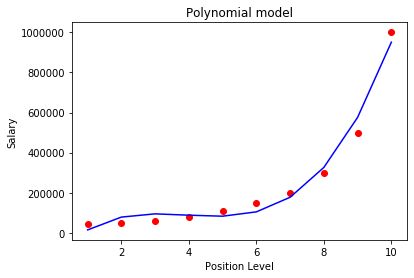

In [16]:
##visualising the Polynomial Model Formed

plt.scatter(X,y,color="red")
plt.plot(X,Linear_reg2.predict(X_poly),color='blue')
plt.title('Polynomial model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [17]:
#Predicting values using Linear Model

print(Linear_reg.predict([[6.5]]))

[330378.78787879]


In [18]:
#Predicting values using Polynomial Model

print(Linear_reg2.predict(polynomial_reg.fit_transform([[6.5]])))

[133259.46969697]
